In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Changes imports to look one folder up.
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from Sophos import SophosNet as sn

In [2]:
model = sn.Model()
l1 = sn.Layer(2, 2)
l2 = sn.Layer(2, 1)
a1 = sn.Activation('sigmoid')
a2 = sn.Activation('sigmoid')
model.add(l1)
model.add(a1)
model.add(l2)
model.add(a2)
model.setLearningRate(0.1)

In [22]:
model.setLearningRate(0.0005)

In [23]:
plotTrueValues = []
plotFalseValues = []
plotError = list()

num_test = 100000

# Testing Data
test_coords = []
test_y = []
for i in range(num_test):
    test_coord = np.matrix([np.random.normal(1, 10.25), np.random.normal(1, 10.25)])
    coord_value = np.abs(test_coord[0, 0] - test_coord[0, 1]) <= 10.25
    test_coords.append(test_coord)
    test_y.append(coord_value)

for i in range(50000):
    coord = np.matrix([np.random.normal(1, 10.25), np.random.normal(1, 10.25)])
    coordValue = np.abs(coord[0,0] - coord[0,1]) <= 10.25
    coordBinary = 1 if coordValue else 0
    if (coordValue):
        plotTrueValues.append([coord[0, 0], coord[0,1]])
    else:
        plotFalseValues.append([coord[0, 0], coord[0,1]])
    model.train(coord, coordBinary)
    # Check Accuracy
    correct = 0
    #print(i)
    if i % 5000 == 0:
        for j in range(num_test-1):
            a = model.predictStep(test_coords[j])
            if a == test_y[j]:
                correct += 1
        accuracy = correct/num_test
        print(accuracy)
        plotError.append(accuracy)
#     plotError.append(model.getTotalError())
#     print(model.getTotalError())
    #print(coord)

0.99869
0.99838
0.99906
0.99887
0.99857
0.99919
0.99965
0.99812
0.99761
0.99922


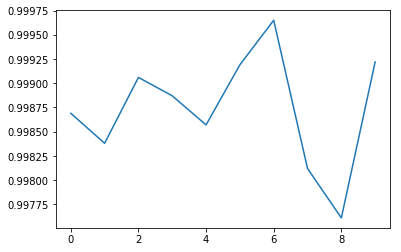

In [24]:
plt.plot(plotError)
plt.show()

In [ ]:
print(l2.getWeights())

In [ ]:
model.feed(test_coords[3])

In [ ]:
# print(plotTrueValues)
# x, y = zip(plotTrueValues)
plt.scatter([x[0] for x in plotFalseValues], [y[1] for y in plotFalseValues], color='blue')
plt.scatter([x[0] for x in plotTrueValues], [y[1] for y in plotTrueValues], color='red')
plt.show()